* **Courses:** Fall 2022-IE 532-Analysis of Network Data-Section AN
* **Topic:** Homework_1
* **Student name:**  Chen Wang
* **collaborators:** Jo-Ting Wang/Jasmine Chao

# Question 1.a
![question 1.a](Figures/question_1.a.png)

In [1079]:
subsequences = ['CAT' , 'ATT' , 'ATG', 'TAT' , 'TTG', 'TGC', 'TGT' , 'GTA']

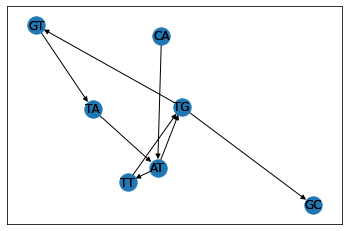

In [1080]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    for i in sub:
        subseq1=i[0:2]
        subseq2=i[1:3]
        G.add_node(subseq1)
        G.add_node(subseq2)
    for (i,j) in combinations(G.nodes(),2):
        subseq1=str(i)
        subseq2=str(j)
        subseq=subseq1[0:2]+subseq2[1]  # string operations between say "CA"+"T" -> "CAT"
        if subseq1[1]==subseq2[0] and subseq in sub:
            G.add_edge(i,j)
        subseq=subseq2[0:2]+subseq1[1]
        if subseq2[1]==subseq1[0] and subseq in sub:
            G.add_edge(j,i)
    return G

G = construct_graph_from(subsequences) 
pos=nx.spring_layout(G)  
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [1081]:
for i in G.nodes():
    if G.in_degree(i)<G.out_degree(i):
        start=i
    elif G.in_degree(i)>G.out_degree(i):
        stop=i

G.add_edge(stop, start)
cycle=list(nx.eulerian_circuit(G, start))
print(cycle)
DNA=[cycle[0][0]]
for i in range(1,len(cycle)):
    DNA.append(str(cycle[i][0][1])) ## Add 1st end ('CA', 'AT') 'T' or ('AT', 'TT') 'T'
print(''.join(DNA))

[('CA', 'AT'), ('AT', 'TT'), ('TT', 'TG'), ('TG', 'GT'), ('GT', 'TA'), ('TA', 'AT'), ('AT', 'TG'), ('TG', 'GC'), ('GC', 'CA')]
CATTGTATGC


## Answer 1.a

![Answer 1.a](Figures/Answer_1a.png)

# Question 1.b
![question 1.b](Figures/question_1.b.png)

### Wrong Try
According to the Eulerian cycle, There can only allow two nodes that are not perfect, one lacks the input edge, and another lacks the output edge.

Now we understand at the node "CC", "AC" requires one output edge; while in the node "CT", "GG",  it needs an input edge. Therefore, we need to eliminate one of "CC" and "AC", one of "CT" and "GG".

If my goal is to eliminate the node "CC", and "CT" for example, we can not just create only one node. Because if we just create a node, the name of the node should be "CC", and the new subsequences should add "CCC", "CCT", reppectively. it will violate that each node should have its unique name. and when I execute the code it will show **"This is not Eulerian."**

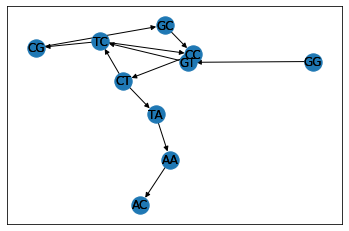

NetworkXError error: subsequences_wrong is not Eulerian.
Original subsequences ['GGT', 'GTC', 'TCC', 'CCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC']
Newly added subsequences: 'CCT'
--------------------------------------------------


In [1082]:
import copy
subsequences_2 = ['GGT', 'GTC', 'TCC', 'CCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC']
subsequences_wrong = copy.copy(subsequences_2)
Newly_add = "CCT"
subsequences_wrong.append(Newly_add)

try:
    G_2 = construct_graph_from(subsequences_wrong) 
    pos_2=nx.spring_layout(G_2) 
    nx.draw_networkx(G_2,pos_2)
    nx.draw_networkx_labels(G_2,pos_2)
    plt.show()
        
    for i in G_2.nodes():
        if G_2.in_degree(i) < G_2.out_degree(i):
            start = i
        elif G_2.in_degree(i) > G_2.out_degree(i):
            stop = i

    G_2.add_edge(stop, start)
    cycle_2=list(nx.eulerian_circuit(G_2, start))
    print(cycle_2)
    DNA_2 = [cycle_2[0][0]]
    for i in range(1,len(cycle_2)):
        DNA_2.append(str(cycle_2[i][0][1])) 
    print('The result is '.join(DNA_2))
        
except nx.NetworkXError:
    print("\033[1m\033[91mNetworkXError error: subsequences_wrong is not Eulerian.\033[0m")
    print("Original subsequences", subsequences_2)
    print("Newly added subsequences: '{}'".format(Newly_add))
    print("-"*50)

### Correct Try
Hence, in order to meet the criteria, I create **2 nodes**, I name it to "CK", "KC". You can see in the below picture. Therefore, I should add **3 subsequences** into connection.

In [1083]:
## define three new nodes --> that will create 3 edges and 3 subsequences
New_add = ['CCK', 'CKC', 'KCT']
subsequences_3 = copy.copy(subsequences_2)
for i in New_add:
    subsequences_3.append(i)

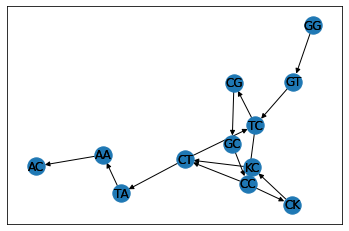

In [1084]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    for i in sub:
        subseq1=i[0:2]
        subseq2=i[1:3]
        G.add_node(subseq1)
        G.add_node(subseq2)
    for (i,j) in combinations(G.nodes(),2):
        subseq1=str(i)
        subseq2=str(j)
        subseq=subseq1[0:2]+subseq2[1]  # string operations between say "CA"+"T" -> "CAT"
        if subseq1[1]==subseq2[0] and subseq in sub:
            G.add_edge(i,j)
        subseq=subseq2[0:2]+subseq1[1]
        if subseq2[1]==subseq1[0] and subseq in sub:
            G.add_edge(j,i)
    return G

G_3 = construct_graph_from(subsequences_3) 
pos_3 = nx.spring_layout(G_3) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G_3 ,pos_3)
nx.draw_networkx_labels(G_3,pos_3)
plt.show()

In [1085]:
for i in G_3.nodes():
    if G_3.in_degree(i) < G_3.out_degree(i):
        start=i
    elif G_3.in_degree(i) > G_3.out_degree(i):
        stop=i

G_3.add_edge(stop, start)
cycle_3 = list(nx.eulerian_circuit(G_3, start))
print(cycle_3)
DNA_3=[cycle_3[0][0]]
for i in range(1,len(cycle_3)):
    DNA_3.append(str(cycle_3[i][0][1]))
print(''.join(DNA_3))

[('GG', 'GT'), ('GT', 'TC'), ('TC', 'CG'), ('CG', 'GC'), ('GC', 'CC'), ('CC', 'CK'), ('CK', 'KC'), ('KC', 'CT'), ('CT', 'TC'), ('TC', 'CC'), ('CC', 'CT'), ('CT', 'TA'), ('TA', 'AA'), ('AA', 'AC'), ('AC', 'GG')]
GGTCGCCKCTCCTAAC


Bingo, the final result of the Eulerian cycle will be **"GGTCGCCKRCTCCTAAC"**

## Answer 1.b

![Answer 1.b](Figures/Answer_1b.png)

# Question 2.a
![question 2.a](Figures/question_2.a.png)

## Answer 2.a

![Answer 2.a](Figures/Answer_2a.png)

# Question 2.b
![question 2.b](Figures/question_2.b.png)

## Answer 2.b

![Answer 2.b](Figures/Answer_2b.png)

# Question 3.a
![question 3.a](Figures/question_3.a.png)

https://www.gurobi.com/documentation/9.5/examples/multiscenario_py.html

In [1086]:
import gurobipy as gp
from gurobipy import *

cost = [[ 3,  5,  8, 12, 10, 11], 
        [ 6,  7, 10, 12,  8, 10], 
        [ 5,  3,  8, 10, 12, 10], 
        [ 7,  6,  7, 10,  9,  5],
        [10,  8,  5,  8,  6,  5],
        [12,  6,  4,  7,  5,  4],
        [ 7, 10,  6,  6,  8,  3],
        [ 5,  6,  9,  4,  4,  7],
        [ 8, 10,  7,  5,  4,  6],
        [10, 12,  8,  3,  4,  6]]

fixed_cost = [1750000, 2000000, 2500000, 2250000, 1500000, 1000000]
capacity = [75, 50, 120, 100, 60, 50]
demand = [25, 15, 20, 10, 15, 15, 25, 20, 30, 20]

N = range(len(capacity))
K = range(len(demand))

print("N = {}, K = {}".format(N,K))

N = range(0, 6), K = range(0, 10)


In [1087]:
m = Model("facility")

In [1088]:
## Create a variable to judge if the site should open or not
open = m.addVars(N, vtype=GRB.BINARY, obj=fixed_cost, name="open")

In [1089]:
## Create a variable to judge how many product this site should provide
transport = m.addVars(K, N, obj=cost, name="trans")

In [1090]:
## Calculate each column's sum: expr = x.sum('*', 3) # LinExpr: x[1,3] + x[2,3]
## introduction guide: https://www.gurobi.com/documentation/9.5/refman/py_tupledict_sum.html
m.addConstrs(
    (transport.sum('*', i) <= capacity[i]*open[i] for i in N), "Capacity")
m

<gurobi.Model Continuous instance facility: 0 constrs, 0 vars, No parameter changes>

In [1091]:
m.addConstrs(
    (transport.sum(j) == demand[j] for j in K),
    "Demand")
m

<gurobi.Model Continuous instance facility: 0 constrs, 0 vars, No parameter changes>

In [1092]:
for i in N:
    open[i].Start = 1.0

In [1093]:
print('Initial guess:')
maxFixed = max(fixed_cost)
for i in N:
    if fixed_cost[i] == maxFixed:
        open[i].Start = 0.0
        print('Closing plant %s' % i)
        break
print('')

Initial guess:
Closing plant 2



In [1094]:
m.Params.Method = 5

Set parameter Method to value 5


In [1095]:
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 16 rows, 66 columns and 126 nonzeros
Model fingerprint: 0x01fedbb2
Variable types: 60 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [3e+00, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 3e+01]

User MIP start produced solution with objective 8.50076e+06 (0.02s)
Loaded user MIP start with objective 8.50076e+06

Presolve time: 0.00s
Presolved: 16 rows, 66 columns, 126 nonzeros
Variable types: 60 continuous, 6 integer (6 binary)

Root relaxation: objective 4.063665e+06, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4063665.00    0    1 8500760.00 4063665.00  52.2%     -    0s
H    0     0  

In [1096]:
final_open = []
for i in N:
    final_open.append(int(open[i].x))
print("Warehouse: [1, 2, 3, 4, 5, 6]")
print("Result:   ", final_open)

print("\n")
for non_zero in N:
    if open[non_zero].x > 0:
        print("We should build warehouse {}".format(non_zero))

Warehouse: [1, 2, 3, 4, 5, 6]
Result:    [1, 0, 1, 0, 0, 0]


We should build warehouse 0
We should build warehouse 2


In [1097]:
print("Number of products in each factory:\n")
for i in K:
    for j in N:

        print(int(transport[i,j].x),sep='',end='    ')
    print()


    


Number of products in each factory:

25    0    0    0    0    0    
15    0    0    0    0    0    
15    0    5    0    0    0    
0    0    10    0    0    0    
0    0    15    0    0    0    
0    0    15    0    0    0    
0    0    25    0    0    0    
20    0    0    0    0    0    
0    0    30    0    0    0    
0    0    20    0    0    0    


# Question 3.b
![question 3.b](Figures/question_3.b.png)

In [1098]:
capacity = [75, 50, 120, 100, 60, 50] ## rollback the capacity because in the final I will modify it to do test.
model_2 = Model("only_one_facility")

In [1099]:
## Create a variable to judge if the site should open or not
open_2 = model_2.addVars(N, vtype=GRB.BINARY, obj=fixed_cost, name="open")

## Create a variable to judge how many product this site should provide
transport_2 = model_2.addVars(K, N, obj=cost, name="trans")

In [1100]:
## only revise here. Because I want to change my plan from nmultiple warehouse allowed to be constraint at one warehouse, 
## Therefore, summary of open_2 should be equal or less than 1, 
## notice, open_2.sum(i) for i in N means summary the inside data of open_2[i]. i.e: if open_2[0] = [1,2,3,4] then at at i = 0, 
## open_2.sum(i) for i in N wil be 10, 

## if we want to calculate all the summary of open_2[i] for i in N, we should use open_2.sum(). 
## However, at this point, an error "'Missing constraint index'" will happen because model_2.addConstrs can only be used at
## Constraint number >2, That is, should use for loop
## so we should use model_2.addConstr instead of model_2.addConstrs in order to execute the code smoothly.

model_2.addConstrs(
    (transport_2.sum('*', i) <= capacity[i]*open_2[i] for i in N), "Capacity")

model_2.addConstr(
    (open_2.sum() <= 1 ), "check")


model_2.addConstrs(
    (transport_2.sum(j) == demand[j] for j in K),
    "Demand")

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>}

In [1101]:
model_2.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 17 rows, 66 columns and 132 nonzeros
Model fingerprint: 0xad7d1dc6
Variable types: 60 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [3e+00, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


In [1102]:
## the boolean open_2 can not find an open warehouse!!
open_2

{0: <gurobi.Var open[0]>,
 1: <gurobi.Var open[1]>,
 2: <gurobi.Var open[2]>,
 3: <gurobi.Var open[3]>,
 4: <gurobi.Var open[4]>,
 5: <gurobi.Var open[5]>}

The result looks strange, but if we think about it twice, it can be easily understood. Let's imagine the question if we want to choose only one warehouse, which warehouse can save us the most money? Beyond the question we should understand one question, they should have at least one warehouse that satisfies the problem, and then we can do a comparison. But it no warehouse satisfy the basic requirements?

The answer is no warehouse satisfies the basic requirement. Because one warehouse should satisfy the summary of demand, that is, 190 in total. But no warehouse has such capacity. Therefore, the function of optimize can not find an answer!!

### Test 
if we want to get a result, we should modify the original data. Hence, I multiply each capacity by 10 to check what it will happen.

In [1103]:
## All capacity multiple by 10
capacity = [750, 500, 1200, 1000, 600, 500]

In [1104]:
model_3 = Model("test")

In [1105]:
## Create a variable to judge if the site should open or not
open_3 = model_3.addVars(N, vtype=GRB.BINARY, obj=fixed_cost, name="open")

## Create a variable to judge how many product this site should provide
transport_3 = model_3.addVars(K, N, obj=cost, name="trans")


model_3.addConstrs(
    (transport_3.sum('*', i) <= capacity[i]*open_3[i] for i in N), "Capacity")

model_3.addConstr(
    (open_3.sum() <= 1 ), "check")


model_3.addConstrs(
    (transport_3.sum(j) == demand[j] for j in K),
    "Demand")

model_3.optimize()



Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 17 rows, 66 columns and 132 nonzeros
Model fingerprint: 0x14d96d45
Variable types: 60 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [3e+00, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve removed 17 rows and 66 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 1.00133e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.001325000000e+06, best bound 1.001325000000e+06, gap 0.0000%


In [1106]:
final_open = []
for i in N:
    if int(open_3[i].x) != 0:
        print("If the capacity multiple with 10, we should choose build \033[1m\033[91mwarehouse {}\033[0m to storage our products.\n".format(i+1))
    final_open.append(int(open_3[i].x))
print("Warehouse: [1, 2, 3, 4, 5, 6]")
print("Result:   ", final_open)

If the capacity multiple with 10, we should choose build warehouse 6 to storage our products.

Warehouse: [1, 2, 3, 4, 5, 6]
Result:    [0, 0, 0, 0, 0, 1]


In [1107]:
print("Number of products in each factory:")
for i in K:
    for j in N:

        print(int(transport_3[i,j].x),sep='',end='    ')
    print('')


Number of products in each factory:
0    0    0    0    0    25    
0    0    0    0    0    15    
0    0    0    0    0    20    
0    0    0    0    0    10    
0    0    0    0    0    15    
0    0    0    0    0    15    
0    0    0    0    0    25    
0    0    0    0    0    20    
0    0    0    0    0    30    
0    0    0    0    0    20    


We can see if the capacity is enough to fullfill the need, the most suitable warehouse will be warehouse 6. It make sense because the fixed_cost of warehouse is the lowest.

# Question  4
![question 4](Figures/question_4.png)

In [1108]:
m_Sudoku = Model("Sudoku")

In [1109]:
Grid = [
[0,0,6, 0,8,0, 5,0,0],
[9,0,0, 3,0,0, 0,2,0],
[0,4,0, 0,0,1, 0,0,7],

[0,0,0, 0,0,5, 6,0,0],
[0,2,0, 0,4,0, 0,1,0],
[3,0,0, 0,0,0, 0,0,9],

[0,0,1, 9,0,0, 0,3,0],
[0,0,0, 0,2,0, 4,0,0],
[0,5,0, 0,0,7, 0,0,0]]

#N represents the Big Square comprised of 9 smaller squares
N = range(9)

#K represents the numbers 1-9
K = range(1,10)

In [1110]:
## Create 9*9*9 variables, each can be 0 or 1
X = {(i,j,k): m_Sudoku.addVar(vtype=GRB.BINARY) for i in N for j in N for k in K}

In [1111]:
## Given True(1), when the opportunities of each item inside X is larger than 0
PreAssign = {
    (i,j): m_Sudoku.addConstr(X[i,j,Grid[i][j]]==1)
    for i in N for j in N if Grid[i][j]>0}

In [1112]:
## each cell can be one number. For example, Grid[8][8] can be 1~9, meaning the sum of X: (8,8,k) can be only and only if 1
OnePerSquare = {
    (i,j): m_Sudoku.addConstr(quicksum(X[i,j,k] for k in K)==1)
    for i in N for j in N}

In [1113]:
## each row can be one specific number. For example, Grid[8][j] can only put a 9, 
## which means the sum of X: (8, j, 9) can be only and only if 1.
EachValueInRow = {
    (i,k): m_Sudoku.addConstr(quicksum(X[i,j,k] for j in N)==1)
    for i in N for k in K}

In [1114]:
## each column can be one specific number. For example, Grid[i][8] can only put a 9, 
## which means the sum of X: (i, 8, 9) can be only and only if 1.
EachValueInCol = {
    (j,k): m_Sudoku.addConstr(quicksum(X[i,j,k] for i in N)==1)
    for j in N for k in K}

In [1115]:
## Define each SubSquares can only include 1~9. (ii, jj, k) is a SubSquare
EachValueInSubSquares = {
    (ii,jj,k): m_Sudoku.addConstr(quicksum(X[i,j,k] 
                        for i in range(3*ii,3*ii+3)  ## ii transfer to i
                        for j in range(3*jj,3*jj+3))==1) ## jj transfer to j
    for ii in range(3) for jj in range(3) for k in K}

In [1116]:
m_Sudoku.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 347 rows, 729 columns and 2939 nonzeros
Model fingerprint: 0x92737a19
Variable types: 0 continuous, 729 integer (729 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 347 rows and 729 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


In [1117]:
print("The result is:\n")
print('---+---+---')
for i in N:
    if i==3 or i==6:
        print('---+---+---')
    for j in N:
        if j==3 or j==6:
            print('|', end='')
        for k in K:
            if X[i,j,k].x > 0.9:
                print(k,sep='',end='')
    print('')
print('---+---+---')

The result is:

---+---+---
136|782|594
987|354|126
542|691|387
---+---+---
798|135|642
625|849|713
314|276|859
---+---+---
471|968|235
869|523|471
253|417|968
---+---+---
